# Amazon Food reviews using different NLP sentiment analyzers : A comparitive study

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 700 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

# Step 1. VADER sentiment analyzer

## Extract reviews.csv from zip folder and read in the data

In [ ]:
file = ZipFile('/content/amazon-fine-food-reviews.zip')
file.extract('Reviews.csv')
file.close()

In [ ]:
df = pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Import text processing libraries of NLTK


### We are going to perform sentiment analysis on Text of the user reviews using VADER( Valence Aware Dictionary and sEntiment Reasoner) . VADER is a pre-trained model that uses rule-based values tuned to sentiments from social media. It evaluates the text of a message and gives you an assessment of not just positive and negative, but the intensity of that emotion as well.<br> It uses a dictionary of terms that it can evaluate like :<br>

### *   Negations - a modifier that reverses the meaning of a phrase ("not great").
### *   Contractions - negations, but more complex ("wasn’t great").
### *   Punctuation - increased intensity ("It’s great!!!").
### *   Slang - variations of slang words such as "kinda", or "hella".

### It's even able to understand acronyms ("rofl") and emoji (❤).

###  The scoring is a ratio of the proportion for text that falls into each category. Language is not black and white, so it is rare to see a completely positive or a completely negative score. Since this model has been pre-trained for social media, it should be very applicable to user food reviews on Amazon.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_new = pd.DataFrame()
sentiment_scores = dict()
df_new['Text'] = df['Text'][:500]
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = pd.DataFrame([analyzer.polarity_scores(val) for val in df_new['Text']])
sentiment_scores.head()

,neg,neu,pos,compound
0,0.000,0.695,0.305,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.091,0.754,0.155,0.8265
3,0.000,1.000,0.000,0.0000
4,0.000,0.552,0.448,0.9468


In [ ]:
# merged the sentiment scores with text
df_new = pd.concat([df_new,sentiment_scores],axis=1)
df_new.rename_axis('Id',inplace=True)
df_new.head()

,Text,neg,neu,pos,compound
Id,,,,,
0,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


In [ ]:
# define label on each text based on intensity of their sentiments
def label(df):
    labels = []
    for id in range(len(df)):
        if df['compound'][id]>=0.5:
            labels.append('Positive')
        elif (df['compound'][id]<0.5 and df['compound'][id]>=0):
            labels.append('Neutral')
        elif df['compound'][id]<0:
            labels.append('Negative')
    return labels
df_new['label'] = label(df_new)
df_new.head()

,Text,neg,neu,pos,compound,label
Id,,,,,,
0,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,Negative
2,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,Positive
3,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,Neutral
4,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,Positive


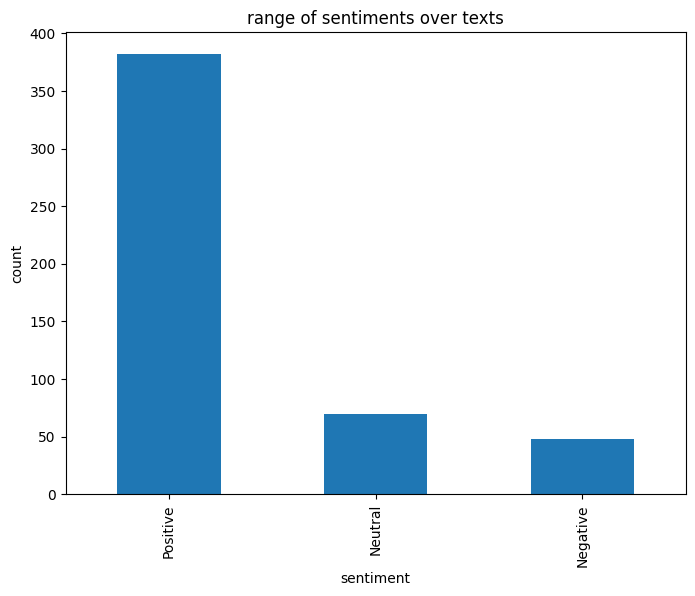

In [ ]:
df_new['label'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('range of sentiments over texts')
plt.show()

# Step 2. Word Cloud for each sentiment

## Perform text preprocessing and visualize a word cloud of most commonly used words in reviews


*   change text style to lowercase
*   remove hyperlinks and punctuations
*   Remove stopwords
*   lemmatize texts



In [ ]:
stopword_list = stopwords.words('english')
stopword_list[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
# apply lowercase style to all texts
def lower(text):
    return text.lower()
# remove hyperlinks
def remove_link(text):
    return re.sub(r'http\S+','',text)
# remove stopwords and punctuation marks
def remove_stopwords_puncts(text):
    return [i for i in text.split(' ') if (i not in stopword_list and i not in string.punctuation)]
# lemmatize each word in text
def lemma(text):
    text_new = [WordNetLemmatizer().lemmatize(i) for i in WhitespaceTokenizer().tokenize(text)]
    return text_new
# join words from list into a string text
def join_words(strs):
    return ' '.join(strs)


In [ ]:
df_new['cleaned_text'] = df_new['Text'].apply(lower).apply(remove_link).apply(remove_stopwords_puncts).apply(join_words)
df_new['cleaned_text'] = df_new['cleaned_text'].apply(lemma).apply(join_words)
df_new['cleaned_text'][:5]

Id
0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: cleaned_text, dtype: object

In [ ]:
df_new.head()

,Text,neg,neu,pos,compound,label,cleaned_text
Id,,,,,,,
0,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,Positive,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,Negative,product arrived labeled jumbo salted peanuts.....
2,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,Positive,"confection around centuries. light, pillowy ci..."
3,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,Neutral,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,Positive,great taffy great price. wide assortment yummy...


## Generate wordcloud for all types of sentiments

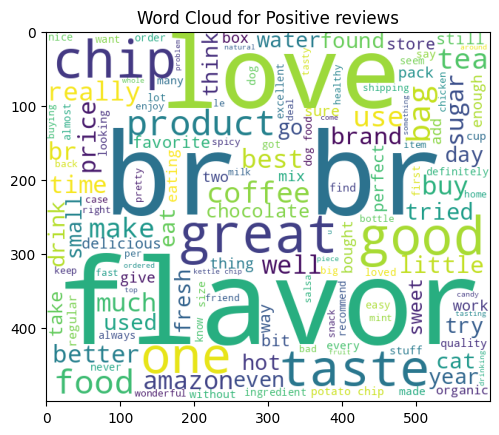

In [ ]:
from os import sep
from wordcloud import WordCloud

wc = WordCloud(width=600,
               height=500,
               min_font_size=10,
               background_color='white')
positive_sentiment_wc = wc.generate(df_new[df_new['label']=='Positive']['cleaned_text'].str.cat(sep=' '))
plt.imshow(positive_sentiment_wc)
plt.title('Word Cloud for Positive reviews')
plt.show()

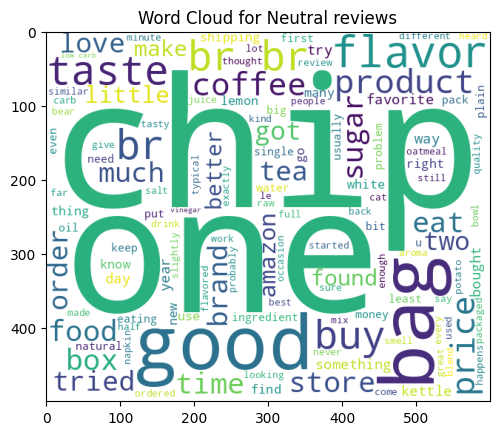

In [ ]:
neutral_sentiment_wc = wc.generate(df_new[df_new['label']=='Neutral']['cleaned_text'].str.cat(sep=' '))
plt.imshow(neutral_sentiment_wc)
plt.title('Word Cloud for Neutral reviews')
plt.show()

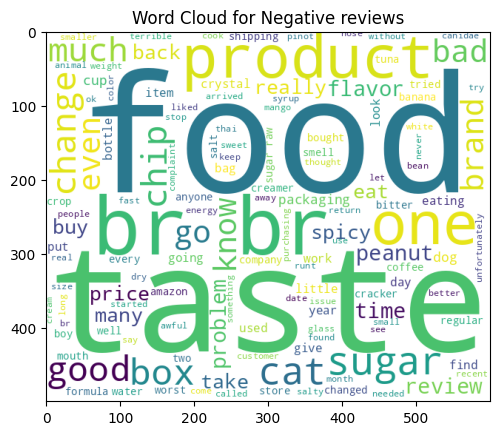

In [ ]:
neg_sentiment_wc = wc.generate(df_new[df_new['label']=='Negative']['cleaned_text'].str.cat(sep=' '))
plt.imshow(neg_sentiment_wc)
plt.title('Word Cloud for Negative reviews')
plt.show()

# Step 3. AWS Comprehend NLP service

In [ ]:
!pip install boto3
import boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import os
# make sure you have the environment variable set in HOME path
client = boto3.client('comprehend',
                   aws_access_key_id=os.environ.get('AWS_ACCESS_KEY'),
                   aws_secret_access_key =os.environ.get('AWS_SECRET_KEY'),
                   region_name=os.environ.get('AWS_DEFAULT_REGION'))

aws_Sentiments = []
aws_SentimentScores = []
for n in range(len(df_new)):
    aws_Sentiments.append(client.detect_sentiment(Text =df_new['Text'][n],LanguageCode='en')['Sentiment'])
    aws_SentimentScores.append(client.detect_sentiment(Text =df_new['Text'][n],LanguageCode='en')['SentimentScore'])
temp = pd.DataFrame(aws_SentimentScores)
temp.rename(columns={'Positive':'aws_pos',
                     'Negative':'aws_neg',
                     'Neutral':'aws_neu',
                     'Mixed':'aws_mxd'},inplace=True)



In [ ]:
df_new['AWS_comprehend_label'] = aws_Sentiments
df_new['Score'] = df['Score'][:500]
df_results = pd.concat([df_new,temp],axis=1)
df_results.head()


,Text,neg,neu,pos,compound,label,cleaned_text,AWS_comprehend_label,Score,aws_pos,aws_neg,aws_neu,aws_mxd
0,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,Positive,bought several vitality canned dog food produc...,POSITIVE,5,0.996902,0.000697,0.000134,0.002267
1,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,Negative,product arrived labeled jumbo salted peanuts.....,NEGATIVE,1,0.000239,0.994007,0.005743,0.000011
2,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,Positive,"confection around centuries. light, pillowy ci...",POSITIVE,4,0.998714,0.000887,0.000346,0.000053
3,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,Neutral,looking secret ingredient robitussin believe f...,POSITIVE,2,0.995993,0.000678,0.002409,0.000919
4,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,Positive,great taffy great price. wide assortment yummy...,POSITIVE,5,0.999796,0.000058,0.000109,0.000037


In [ ]:
df_new.head()
df_new['AWS_comprehend_label'].value_counts().sort_index

<bound method Series.sort_index of POSITIVE    331
MIXED       104
NEGATIVE     62
NEUTRAL       3
Name: AWS_comprehend_label, dtype: int64>

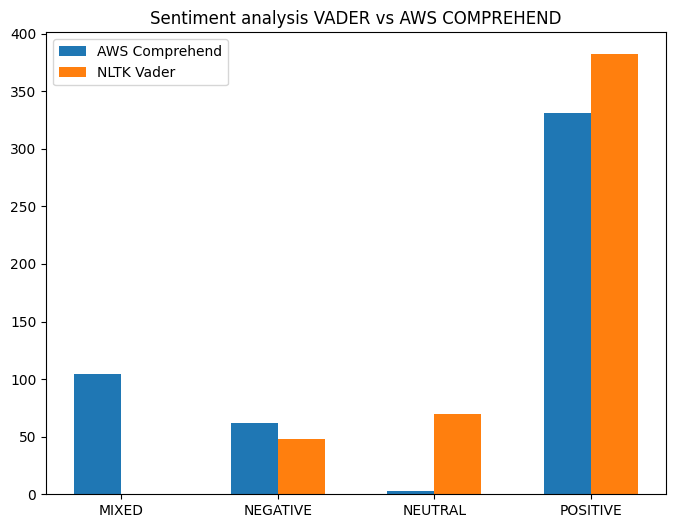

In [ ]:
plt.rcParams['figure.figsize'] = 8,6
width=0.3
ind = np.arange(4)+1
ht1 = df_new['AWS_comprehend_label'].value_counts().sort_index()
ht2 = list(df_new['label'].value_counts().sort_index())
ht2.insert(0,0) # add 0 for mixed sentiment which vader doesn't categorize
plt.bar(ind,height=ht1,width=0.3, label='AWS Comprehend')
plt.bar(ind+width,height=ht2,width=0.3, label='NLTK Vader')
plt.title('Sentiment analysis VADER vs AWS COMPREHEND')
plt.legend()
plt.xticks(ind + width / 2, ht1.index)
plt.show()

## compare actual scores with labeled sentiment score that AWS comprehend got wrong

In [ ]:
pos_text_neg_score = df_results[df_results['Score']==1].sort_values(by=['aws_pos'],ascending=False).iloc[0]['Text']
pos_text_neg_score


'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

## Comprehend could not catch the sarcasm hidden in this 1.0 rated review!

In [ ]:
neg_text_pos_score = df_results[df_results['Score']==5].sort_values(by=['aws_neg'],ascending=False).iloc[0]['Text']
neg_text_pos_score


"This is a fantastic product, and I wish it was readily available in most stores. It's taste is not the greatest, but it's a 2.5 oz. shot, and it's gone in a second. It tastes, more or less, like a concentrated sweet tea. For the record, I've had 5 hour energy, and that tastes FAR worse. I will put up the taste for the results. It's got 150mg of caffeine, which is the equivalent of the big red bulls and monsters. I can't stand sucralose and sugar substitutes, and this is one of the only shot sized energy drinks that has only sugar in it. The sugar is at 9g, which isn't horrible. I used to drink 4 16oz. Red Bulls a day for the caffeine, and this gives me far better energy, and is much more subtle. My preference is black coffee, but I can't drink 8-12 cups a day anymore. Overall, Steaz does it right; real organic ingredients in moderate amounts, and they create big results."

## compare actual scores with labeled sentiment score that VADER got wrong

In [ ]:
vpos_text_neg_score = df_results[df_results['Score']==1].sort_values(by=['pos'],ascending=False).iloc[0]['Text']
vpos_text_neg_score


'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

## Vader failed to capture the subtle mockery!

In [ ]:
vneg_text_pos_score = df_results[df_results['Score']==5].sort_values(by=['neg'],ascending=False).iloc[0]['Text']
vneg_text_pos_score

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Step 4: ROBERTA Hugging Face pretrained model

In [ ]:
!pip install transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.5 MB/s eta 0:00:00


## Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2022)<br>
## This is a RoBERTa-base model trained on ~124M tweets from January 2018 to December 2021, and finetuned for sentiment analysis with the TweetEval benchmark.

In [ ]:
sent_pipeline = pipeline('sentiment-analysis',tokenizer='cardiffnlp/twitter-roberta-base-sentiment-latest',model='cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
sent_pipeline.predict('I am happy')

[{'label': 'positive', 'score': 0.9614965319633484}]

In [ ]:
bert_result = []
for n in range(len(df_results)):
    try:
        bert_result.append(sent_pipeline.predict(df_results['Text'][n]))
    except RuntimeError:
        print(f'Tensor size exceeded at {n}th text')

Tensor size exceeded at 82th text
Tensor size exceeded at 186th text


In [ ]:
pd.DataFrame((bert_result))[0][0]['score']

0.9506064653396606

In [ ]:
bert_label = []
bert_score = []
c= 0
for id in range(len(df_results)):
    try:
        bert_label.append(pd.DataFrame((bert_result))[0][id]['label'])
        bert_score.append(pd.DataFrame((bert_result))[0][id]['score'])
    except KeyError:
        c+=1
        bert_label.append('positive')
        bert_score.append(0.900)

In [ ]:
df_results['bert_score'] = pd.to_numeric(bert_score)
df_results['bert_label'] = bert_label
df_results['bert_label'] = df_results['bert_label'].apply(str.upper)
df_results['label'] = df_results['label'].apply(str.upper)
df_results.head()

,Text,neg,neu,pos,compound,label,cleaned_text,AWS_comprehend_label,Score,aws_pos,aws_neg,aws_neu,aws_mxd,bert_label,bert_score
0,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,POSITIVE,bought several vitality canned dog food produc...,POSITIVE,5,0.996902,0.000697,0.000134,0.002267,POSITIVE,0.950606
1,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,NEGATIVE,product arrived labeled jumbo salted peanuts.....,NEGATIVE,1,0.000239,0.994007,0.005743,0.000011,NEGATIVE,0.716768
2,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,POSITIVE,"confection around centuries. light, pillowy ci...",POSITIVE,4,0.998714,0.000887,0.000346,0.000053,POSITIVE,0.916966
3,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,NEUTRAL,looking secret ingredient robitussin believe f...,POSITIVE,2,0.995993,0.000678,0.002409,0.000919,POSITIVE,0.949957
4,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,POSITIVE,great taffy great price. wide assortment yummy...,POSITIVE,5,0.999796,0.000058,0.000109,0.000037,POSITIVE,0.986190


In [ ]:
df_results['bert_label'].value_counts().sort_index()

NEGATIVE     70
NEUTRAL      49
POSITIVE    381
Name: bert_label, dtype: int64

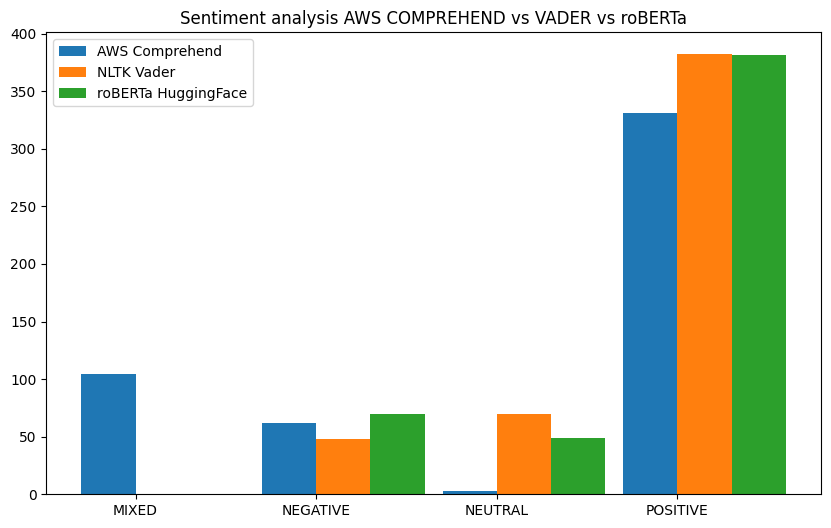

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
width=0.3
ind = np.arange(4)+1
ht1 = df_results['AWS_comprehend_label'].value_counts().sort_index()
ht2 = list(df_results['label'].value_counts().sort_index())
ht2.insert(0,0) # add 0 for mixed sentiment which vader doesn't categorize
ht3 = list(df_results['bert_label'].value_counts().sort_index())
ht3.insert(0,0) # add 0 for mixed sentiment which bert doesn't categorize

#Plot comparision bars
plt.bar(ind,height=ht1,width=0.3, label='AWS Comprehend')
plt.bar(ind+width,height=ht2,width=0.3, label='NLTK Vader')
plt.bar(ind+width*2,height=ht3,width=0.3, label='roBERTa HuggingFace')
plt.title('Sentiment analysis AWS COMPREHEND vs VADER vs roBERTa')
plt.legend()
plt.xticks(ind + width / 2, ht1.index)
plt.show()

## compare actual scores with labeled sentiment score that roBERTa got wrong
### a very straighforward negative review which other models got right btw!

In [ ]:
df_results[(df_results['Score']==1) & (df_results['bert_label']=='POSITIVE')].sort_values(by='bert_score',ascending=False).iloc[0]['Text']



"I haven't used the ham base. It is loaded with MSG. I did not realize this when I ordered it and can not return it because it is a food item"

In [ ]:
df_results[(df_results['Score']==5) & (df_results['bert_label']=='NEGATIVE')].sort_values(by='bert_score',ascending=False).iloc[0]['Text']


'The tomatoes are the star of the classic flavor.  It is clean and really fresh!  Perfect on an avocado chicken sandwich.<br /><br />The spicy flavor is more complex and is the best ketchup I have ever tried.  It is so good I have now used it on foods that would make me seem crazy!'

# The End